
# Investigating Movies' Profits

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report investigate TMDb data set which contains data about 21 features of 10843 movies .I focused on movies revenue. I investigated the association between movies revenues and moves' genres , rating and popularity.


In [1]:
# importing needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading the data and printing out first 5 lines. 
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> ### There is no column about movies profits

In [3]:
# investigating data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### - the type of 'release_date'  column  is object and it should be time.
### - the type of 'release_year' column is int and it should be time or object.
### - the type of 'id' column is int and it should be object.

In [4]:
# investigating the data statistically
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> ### some rows  in budget and budget_adj have 0 value

In [5]:
# number of budget rows with 0 value
df[df['budget_adj'] == 0 ].shape[0]

5696

In [6]:
# number of budget rows with  0 value

df[df['revenue_adj'] == 0].shape[0]

6016

In [7]:
df.shape

(10866, 21)

In [8]:
#investigating if there is a duplicated rows
df.duplicated().sum()

1

In [9]:
df_dup = df[df.duplicated() == True]
df_dup

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


 > ### There is one duplicated record. Its index  is 2090. e need to drop it from our dataset.


##  Cleaning the data set

In [10]:
# creating a new column for movie's profit
df['movie_profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [11]:
# Dropping null values in genres columns
df.dropna(subset=['genres'] , inplace = True)
# insureing that there is no null values
df.genres.isnull().sum()

0

In [12]:
# correcting columns types
df['release_date'].astype('datetime64[ns]' , inplace = True)
df['release_year'].astype('datetime64[ns]' , inplace = True)
df['id'].astype('str' , inplace = True)

0        135397
1         76341
2        262500
3        140607
4        168259
5        281957
6         87101
7        286217
8        211672
9        150540
10       206647
11        76757
12       264660
13       257344
14        99861
15       273248
16       260346
17       102899
18       150689
19       131634
20       158852
21       307081
22       254128
23       216015
24       318846
25       177677
26       214756
27       207703
28       314365
29       294254
          ...  
10836     38720
10837     19728
10838     22383
10839     13353
10840     34388
10841     42701
10842     36540
10843     29710
10844     23728
10845      5065
10846     17102
10847     28763
10848      2161
10849     28270
10850     26268
10851     15347
10852     37301
10853     15598
10854     31602
10855     13343
10856     20277
10857      5921
10858     31918
10859     20620
10860      5060
10861        21
10862     20379
10863     39768
10864     21449
10865     22293
Name: id, Length: 10843,

In [13]:
# Drop duplicated row
df.drop_duplicates(inplace = True)
# insuring that the duplicated row was dropped
df.duplicated().sum()

0

In [14]:
# droping zero values from budjet and revenue
df = df[df['revenue_adj'] != 0]
df = df[df['budget_adj'] != 0]
df.shape

(3854, 22)

<a id='eda'></a>
## Exploratory Data Analysis


### Which movie's genre has the highest profit?

In [15]:
# we need to know the unique genres in the data 
# creating list from genres 
genres = df.genres.values.tolist()
# spliting genres in the list
all_genres = []
for i in genres:
    all_genres += i.split('|')
# droping duplicated values in the list
all_genres = list(dict.fromkeys(all_genres))
all_genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'Foreign',
 'TV Movie']

In [16]:
# Exploring profit feature
df['movie_profit'].describe()
#plt.xlim( 1, 1500000000)

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: movie_profit, dtype: float64

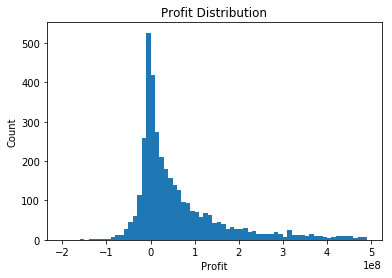

In [67]:
plt.hist(df['movie_profit'] , bins = range(-200000000 , 500000000 , 10000000));
plt.title('Profit Distribution');
plt.xlabel('Profit');
plt.ylabel('Count');


> ### some movies have extraordinary profit

In [18]:
# creating a list for genres average profits
genres_profits = []

for i in all_genres:
    genres_profits.append(df[df.genres.str.contains(i)].movie_profit.mean())
    
genres_profits

[128945315.3265328,
 190151742.57850176,
 136535918.49394682,
 83569128.367707059,
 169755235.38994464,
 70485067.278579563,
 68483701.993490279,
 66666002.886726782,
 172690036.45364919,
 207485229.34557885,
 82132064.14264895,
 71258378.376435861,
 79615540.074935496,
 98625164.36099568,
 64781876.392797709,
 99368000.671359017,
 58165842.989952646,
 19426464.205811825,
 -164463.92911875708,
 51438019.341529332]

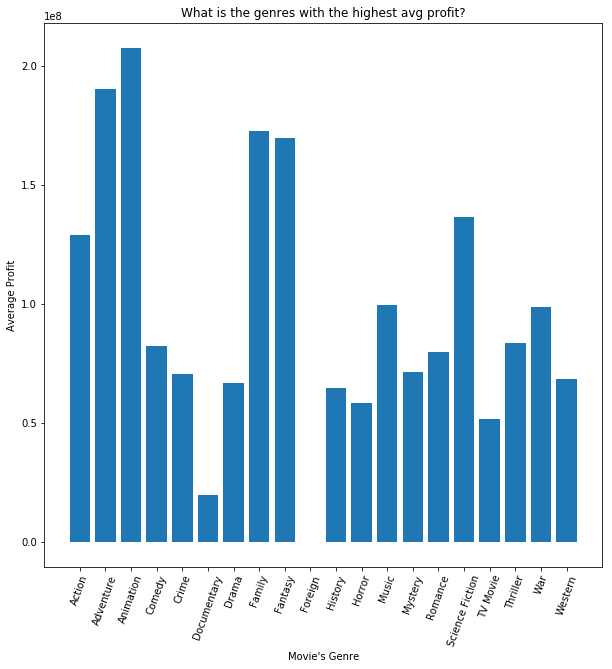

In [19]:
# visualizing the avrage of the three genres
plt.figure(figsize=(10,10));
plt.bar(  all_genres , genres_profits );
plt.ylabel('Average Profit');
plt.xlabel('Movie\'s Genre');
plt.xticks(rotation=70);
plt.title('What is the genres with the highest avg profit?');




> ### from the visual, Animation movies have the highest average profit, and the Documentary movies have the least.

### Q2 : Is voteing associated with profit?

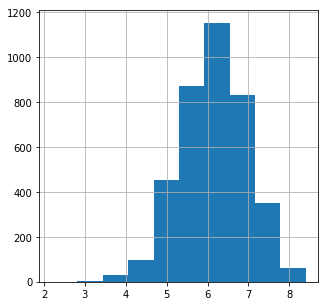

In [20]:
df['vote_average'].hist(figsize = (5 ,5));

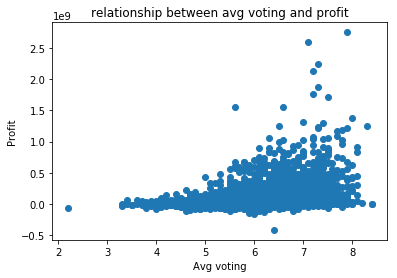

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(data = df , x = 'vote_average' , y = 'movie_profit');
plt.title('relationship between avg voting and profit');
plt.xlabel('Avg voting');
plt.ylabel('Profit');


> ### There is a positive relationship between voting and profit

### Q3 : Is popularity associated with porfit?

In [41]:
# investigating popularity feature
df['popularity'].describe()

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462368
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

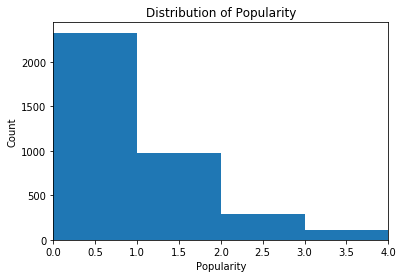

In [40]:
plt.hist(df['popularity'] , bins = range(0 , 30 , 1))
plt.title('Distribution of Popularity');
plt.xlabel("Popularity"),
plt.ylabel("Count");
plt.xlim(0 , 4);

> ### Most of the popularity point between 1 and 4. above that consederd outliers

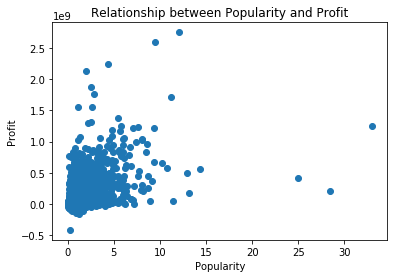

In [23]:
plt.scatter( df.popularity, df.movie_profit);
plt.title('Relationship between Popularity and Profit');
plt.xlabel('Popularity');
plt.ylabel('Profit');


> ### There is a positive relatinship between popularity and profit

<a id='conclusions'></a>
## Conclusions

> I Investigated TMDb data set which contains data about more than 10000 movies. I focused on the profit. To investigate it , I solved some problems in the data and created a new column for profit.Also, each row in genres columns have muliple values. I solved this problem by extracting the unique values for genres. 
I found that Animatin movies have the highest average profit. On top of that, I found that movies with hiegher voting and popularity have hiegher profits but I did not use a statiscal model. so, I can't infere the strenth of the relationship between voting or popularity with profit.


In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0